## Hurricane Classification 

### Description

A Hurricane Classification Project in Deep Learning aims to leverage machine learning techniques to identify, classify, and predict hurricanes or tropical storms based on various meteorological data. This type of project typically focuses on using deep learning models, such as convolutional neural networks (CNNs) or recurrent neural networks (RNNs), to analyze historical weather patterns, satellite images, and sensor data to predict the severity or category of a storm.



### Objective

 The primary goal of this project is to build a deep learning model that can classify hurricanes into different categories based on their strength, size, and other relevant parameters. These categories are generally based on the Saffir-Simpson Hurricane Wind Scale (Category 1-5). The project can also aim to predict future hurricane paths and intensities, improving early warning systems for affected regions.

### Import Libraries

In [48]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from tensorflow import keras
from skimage.transform import resize
from sklearn.utils import shuffle

### Fetch the training data

In [49]:
pwd

'C:\\Users\\Kavya\\Desktop\\Edure\\DEEP LEARNING\\Capstone projects\\hurricane project'

In [50]:
import glob

In [51]:
damage = glob.glob('test/damage/*.jpeg')
no_damage = glob.glob('test/no_damage/*.jpeg')

In [52]:
no_damage

['test/no_damage\\-95.061894_30.007746.jpeg',
 'test/no_damage\\-95.061936_29.828088.jpeg',
 'test/no_damage\\-95.062123_30.056714000000003.jpeg',
 'test/no_damage\\-95.062203_29.82817.jpeg',
 'test/no_damage\\-95.062246_30.056189.jpeg',
 'test/no_damage\\-95.062371_29.829815999999997.jpeg',
 'test/no_damage\\-95.063004_29.8308.jpeg',
 'test/no_damage\\-95.06329699999999_30.037322999999997.jpeg',
 'test/no_damage\\-95.064612_29.792707.jpeg',
 'test/no_damage\\-95.065044_29.832065999999998.jpeg',
 'test/no_damage\\-95.065342_30.039215000000002.jpeg',
 'test/no_damage\\-95.066017_29.811658.jpeg',
 'test/no_damage\\-95.066162_29.792391.jpeg',
 'test/no_damage\\-95.066506_29.831463.jpeg',
 'test/no_damage\\-95.066743_29.832062.jpeg',
 'test/no_damage\\-95.06698_29.831493.jpeg',
 'test/no_damage\\-95.067122_30.03769.jpeg',
 'test/no_damage\\-95.06767099999999_29.813495.jpeg',
 'test/no_damage\\-95.068663_29.831690000000002.jpeg',
 'test/no_damage\\-95.071273_30.039915.jpeg',
 'test/no_damag

### Fetch the testing data

In [54]:
damage_test = glob.glob('test_another/damage/*.jpeg')
no_damage_test = glob.glob('test_another/no_damage/*.jpeg')

In [55]:
no_damage_test

['test_another/no_damage\\-95.062321_30.060401000000002.jpeg',
 'test_another/no_damage\\-95.062533_30.055047.jpeg',
 'test_another/no_damage\\-95.062589_29.830265.jpeg',
 'test_another/no_damage\\-95.062638_30.009412.jpeg',
 'test_another/no_damage\\-95.06315699999999_29.831297999999997.jpeg',
 'test_another/no_damage\\-95.06354_30.007773999999998.jpeg',
 'test_another/no_damage\\-95.065175_30.059086999999998.jpeg',
 'test_another/no_damage\\-95.065347_30.041307.jpeg',
 'test_another/no_damage\\-95.06604899999999_29.831622999999997.jpeg',
 'test_another/no_damage\\-95.066202_29.832154.jpeg',
 'test_another/no_damage\\-95.066283_29.792195.jpeg',
 'test_another/no_damage\\-95.066797_29.832078999999997.jpeg',
 'test_another/no_damage\\-95.06698_29.831493.jpeg',
 'test_another/no_damage\\-95.067092_29.832040999999997.jpeg',
 'test_another/no_damage\\-95.067696_29.831792999999998.jpeg',
 'test_another/no_damage\\-95.067698_29.813492.jpeg',
 'test_another/no_damage\\-95.06804_29.838124.jpeg

### Find the number of images in the Training and Testing set

In [56]:
print(f'Number of images in Training set are\nDamage:{len(damage)}')
print(f'No Damage:{len(no_damage)}')
print(f'Damage test:{len(damage_test)}')
print(f'No Damage test:{len(no_damage_test)}')

Number of images in Training set are
Damage:1000
No Damage:1000
Damage test:192
No Damage test:1000


### Store all the images inside a list and create a list with the corresponding labels

## For Training set

In [57]:
image = []
label = []

for i in damage:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

for i in no_damage:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

### For Testing set

In [58]:
image_test = []
label_test = []

for i in damage:
    img = plt.imread(i)  
    image_test.append(img)
    label_test.append(0)

for i in no_damage:
    img = plt.imread(i) 
    image_test.append(img)
    label_test.append(1)

### Shuffle both image list and label list (In both Training and testing set)

In [59]:
image, label = shuffle(image, label, random_state=100)
image_test, label_test = shuffle(image_test, label_test)

In [60]:
len(label_test)

2000

In [61]:
len(image_test)

2000

### Plot a few images from our shuffled list with its corresponding label (Either from training or test set)

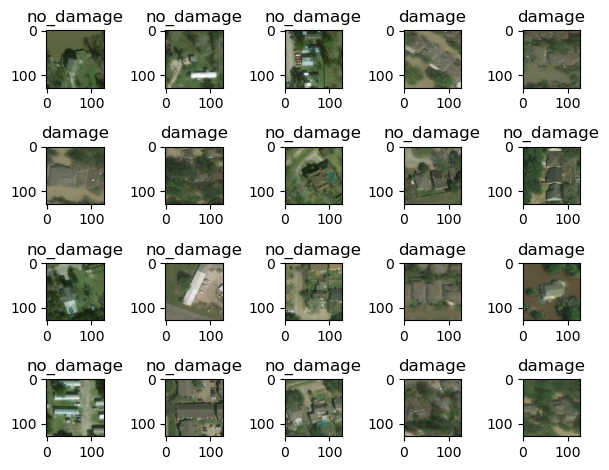

In [62]:
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(image[i])
    plt.title(label[i])
    if label[i]==1:
        plt.title('no_damage')
    else:
        plt.title('damage')
    plt.tight_layout()

### Reshape the images both training and testing set

In [63]:
Xtrain = []
for i in image:
    Xtrain.append(resize(i,(224,224,3)))
Xtrain = np.array(Xtrain)

In [64]:
Xtest = []
for i in image:
    Xtest.append(resize(i, (224,224,3)))
Xtest = np.array(Xtest)

### create numpy arrays named y_train and y_test from our training and testing label lists we created earlier


In [65]:
ytrain = np.array(label)
ytest = np.array(label_test)

### Plot some of our reshaped images

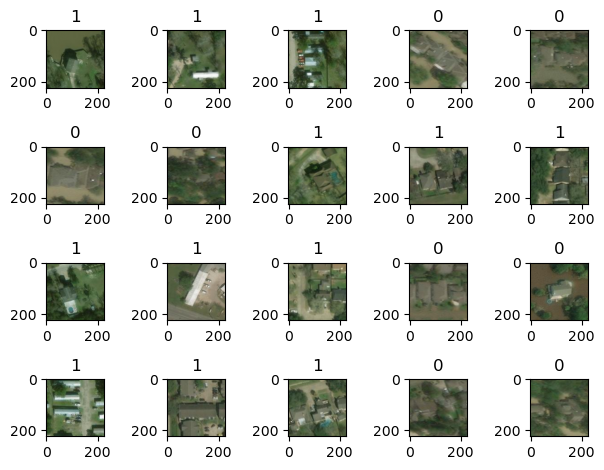

In [66]:
for i in range(20):
    plt.subplot(4,5, i+1)
    plt.imshow(Xtrain[i])
    plt.title(label[i])
    plt.tight_layout()

### Check the shape of X_train and X_test and y_train and y_test

In [67]:
print(f"Shape of Xtrain is:", Xtrain.shape)
print(f"Shape of Xtest is:", Xtest.shape)
print(f"Shape of ytrain is:", ytrain.shape)
print(f"Shape of ytest is:", ytest.shape)

Shape of Xtrain is: (2000, 224, 224, 3)
Shape of Xtest is: (2000, 224, 224, 3)
Shape of ytrain is: (2000,)
Shape of ytest is: (2000,)


### Create a keras Sequential model with convolution layers, Flatten and Hidden layers

In [68]:
model= keras.models.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Conv2D(32,(3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')        
])

C:\Users\Kavya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model

In [69]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Check the summary of our model

In [70]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,972,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,977,185 (22.80 MB)

 Trainable params: 5,977,185 (22.80 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [73]:
model.fit(Xtrain, ytrain, epochs = 15, validation_split = 0.1)

Epoch 1/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 24s 404ms/step - accuracy: 0.9995 - loss: 0.0074 - val_accuracy: 0.8800 - val_loss: 0.5014
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 185ms/step - accuracy: 0.9996 - loss: 0.0052 - val_accuracy: 0.8800 - val_loss: 0.5575
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 186ms/step - accuracy: 0.9976 - loss: 0.0072 - val_accuracy: 0.8750 - val_loss: 0.5640
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 186ms/step - accuracy: 0.9991 - loss: 0.0049 - val_accuracy: 0.8500 - val_loss: 0.6220
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 185ms/step - accuracy: 0.9998 - loss: 0.0068 - val_accuracy: 0.8850 - val_loss: 0.5997
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.8700 - val_loss: 0.6080
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 186ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.8600 - val_loss: 0.6267
Epoch 8/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - accuracy: 1.0000 - loss: 9.9161e-04 - val_

### Evaluate the model

In [72]:
model.evaluate(Xtrain, ytrain)

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9990 - loss: 0.0082


[0.058900922536849976, 0.9869999885559082]

### Make predictions with X_test

In [74]:
ypred = model.predict(Xtest)

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step


### Use np.argmax to fetch indices of max element of the array

### Store the values in a list

In [75]:
ypred = ypred.argmax(axis=1)

### Plot X_test with label from our prediction

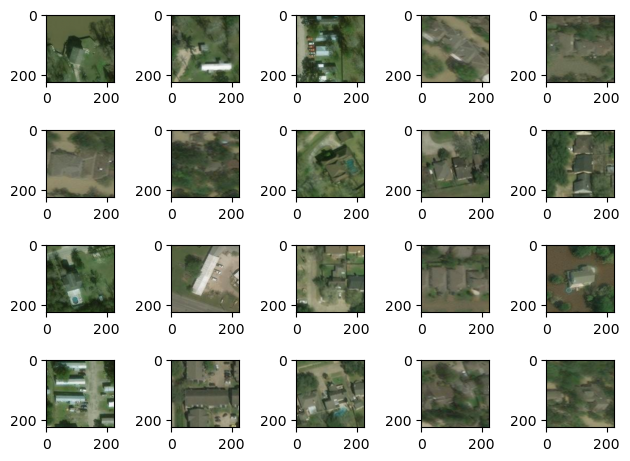

In [76]:
for i in range(20):
    plt.subplot(4,5, i+1)
    plt.imshow(Xtest[i])
    plt.tight_layout()

### Visualise confusion matrix on a heatmap

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay

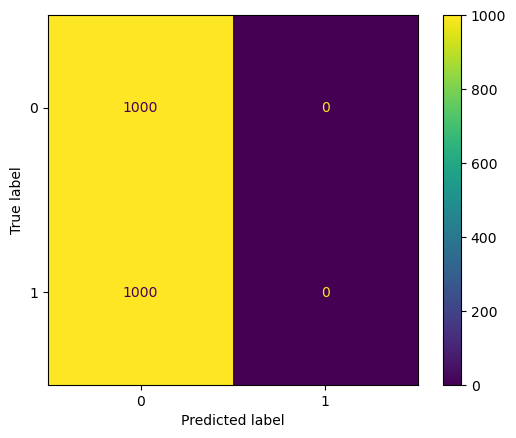

In [79]:
ConfusionMatrixDisplay.from_predictions(ytest, ypred)